### 数据读取

In [5]:
import numpy as np
import pandas as pd

In [10]:
books = pd.read_csv(r'data_set\BX-Books.csv.gz',
                    sep=';',
                    error_bad_lines=False,
                    encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
D:\Programing\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py

In [11]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
books = books.iloc[:, :-3]

In [83]:
books.columns = ['isbn', 'title', 'author', 'year', 'publisher']
books.head()

,isbn,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [14]:
users = pd.read_csv(r'data_set\BX-Users.csv.gz',
                    sep=';',
                    error_bad_lines=False,
                    encoding='latin-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
users.columns = ['user_id', 'location', 'age']

In [16]:
ratings = pd.read_csv(r'data_set\BX-Book-Ratings.csv.gz',
                      sep=';',
                      error_bad_lines=False,
                      encoding='latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
ratings.columns = ['user_id', 'isbn', 'rating']
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
print(users.shape, books.shape, ratings.shape)

(278858, 3) (271360, 5) (1149780, 3)


In [19]:
users.dtypes

user_id       int64
location     object
age         float64
dtype: object

In [20]:
books.dtypes

isbn         object
title        object
author       object
year         object
publisher    object
dtype: object

In [21]:
ratings.dtypes

user_id     int64
isbn       object
rating      int64
dtype: object

### 数据清洗，处理缺失值

#### Books

In [22]:
books.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [23]:
books.loc[books.year == 'DK Publishing Inc']

,isbn,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [24]:
books.loc[books.isbn == '078946697X', 'year'] = 2000
books.loc[
    books.isbn == '078946697X',
    'title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
books.loc[books.isbn == '078946697X', 'author'] = 'Michael Teitelbaum'
books.loc[books.isbn == '078946697X', 'publisher'] = 'DK Publishing Inc'

In [25]:
books.loc[books.isbn == '0789466953', 'year'] = 2000
books.loc[
    books.isbn == '0789466953',
    'title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books.loc[books.isbn == '0789466953', 'author'] = 'James Buckley'
books.loc[books.isbn == '0789466953', 'publisher'] = 'DK Publishing Inc'

In [26]:
books.loc[books.year == 'DK Publishing Inc']

,isbn,title,author,year,publisher


In [27]:
books.loc[books.year == 'Gallimard']

,isbn,title,author,year,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [28]:
books.loc[books.isbn == '2070426769', 'year'] = 2003
books.loc[books.isbn ==
          '2070426769', 'title'] = "Peuple du ciel, suivi de 'Les Bergers"
books.loc[books.isbn == '2070426769', 'author'] = 'Jean-Marie Gustave'
books.loc[books.isbn == '2070426769', 'publisher'] = 'Gallimard'

In [29]:
books.loc[books.year == 'Gallimard']

,isbn,title,author,year,publisher


In [30]:
books.year = pd.to_numeric(books.year, errors='coerce')  # 无效的解析设置为NaN

In [31]:
print(sorted(books.year.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [32]:
books.loc[(books.year > 2004) | (books.year == 0), 'year'] = np.nan

In [33]:
books.year.fillna(books.year.median(), inplace=True)

In [34]:
books.isnull().sum()

isbn         0
title        0
author       1
year         0
publisher    2
dtype: int64

In [35]:
books.year = books.year.astype(np.int32)

In [36]:
print(sorted(books.year.unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]


In [37]:
books.loc[books.publisher.isnull(), :]

,isbn,title,author,year,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [38]:
books.loc[books.title == 'Tyrant Moon', :]

,isbn,title,author,year,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [39]:
books.loc[books.author == 'Elaine Corvidae', :]

,isbn,title,author,year,publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory


In [40]:
books.loc[books.title == 'Finders Keepers', :]

,isbn,title,author,year,publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [41]:
books.loc[books.author == 'Linnea Sinclair', :]

,isbn,title,author,year,publisher
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [42]:
books.publisher.fillna('others', inplace=True)

In [43]:
books.loc[books.author.isnull(), :]

,isbn,title,author,year,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [44]:
books.author.fillna('anonymous', inplace=True)

In [45]:
books.isnull().sum()

isbn         0
title        0
author       0
year         0
publisher    0
dtype: int64

#### Users

In [46]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [47]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [48]:
len(users.user_id)

278858

In [49]:
users.user_id.max()

278858

In [50]:
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [51]:
users.loc[(users.age > 90) | (users.age < 5), :] = np.nan
users.age = users.age.fillna(users.age.median())

In [52]:
users.age = users.age.astype(np.int32)

In [53]:
print(sorted(users.age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


#### Rating

In [54]:
ratings.isnull().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [55]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [56]:
# 只保留在图书列表的书
ratings_new = ratings[ratings.isbn.isin(books.isbn)]

In [62]:
print(len(ratings))
print(len(ratings_new))

1149780
1031136


In [68]:
# 只保住在用户列表的用户
ratings_new = ratings_new[ratings_new.user_id.isin(users.user_id)]

In [69]:
print(len(ratings))
print(len(ratings_new))

1149780
1026157


In [72]:
# 计算稀疏性
n_users = len(users)
n_books = len(books)
n = n_users * n_books

print(f'矩阵稀疏性：{1-len(ratings_new)/n}')

矩阵稀疏性：0.9999864392136647


In [74]:
ratings_new.head(10)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
8,276744,038550120X,7
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0


In [75]:
ratings_exp = ratings_new[ratings_new.rating != 0]

In [76]:
print(len(ratings))
print(len(ratings_new))
print(len(ratings_exp))

1149780
1026157
382117


In [77]:
print(sorted(ratings_exp.rating.unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [78]:
ratings_exp.rating.value_counts()

8     91365
10    70963
7     66102
9     60499
5     45154
6     31551
4      7576
3      5082
2      2360
1      1465
Name: rating, dtype: int64

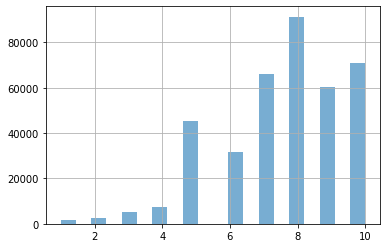

In [79]:
ratings_exp.rating.hist(bins=20, alpha=0.6)

### 写入文件

In [81]:
users.to_csv(r'data_set\users.csv', index=False)
books.to_csv(r'data_set\books.csv', index=False)
ratings_exp.to_csv(r'data_set\ratings.csv', index=False)